# **Sentiment Analysis of the tweets for the #LuciferSeason5.**

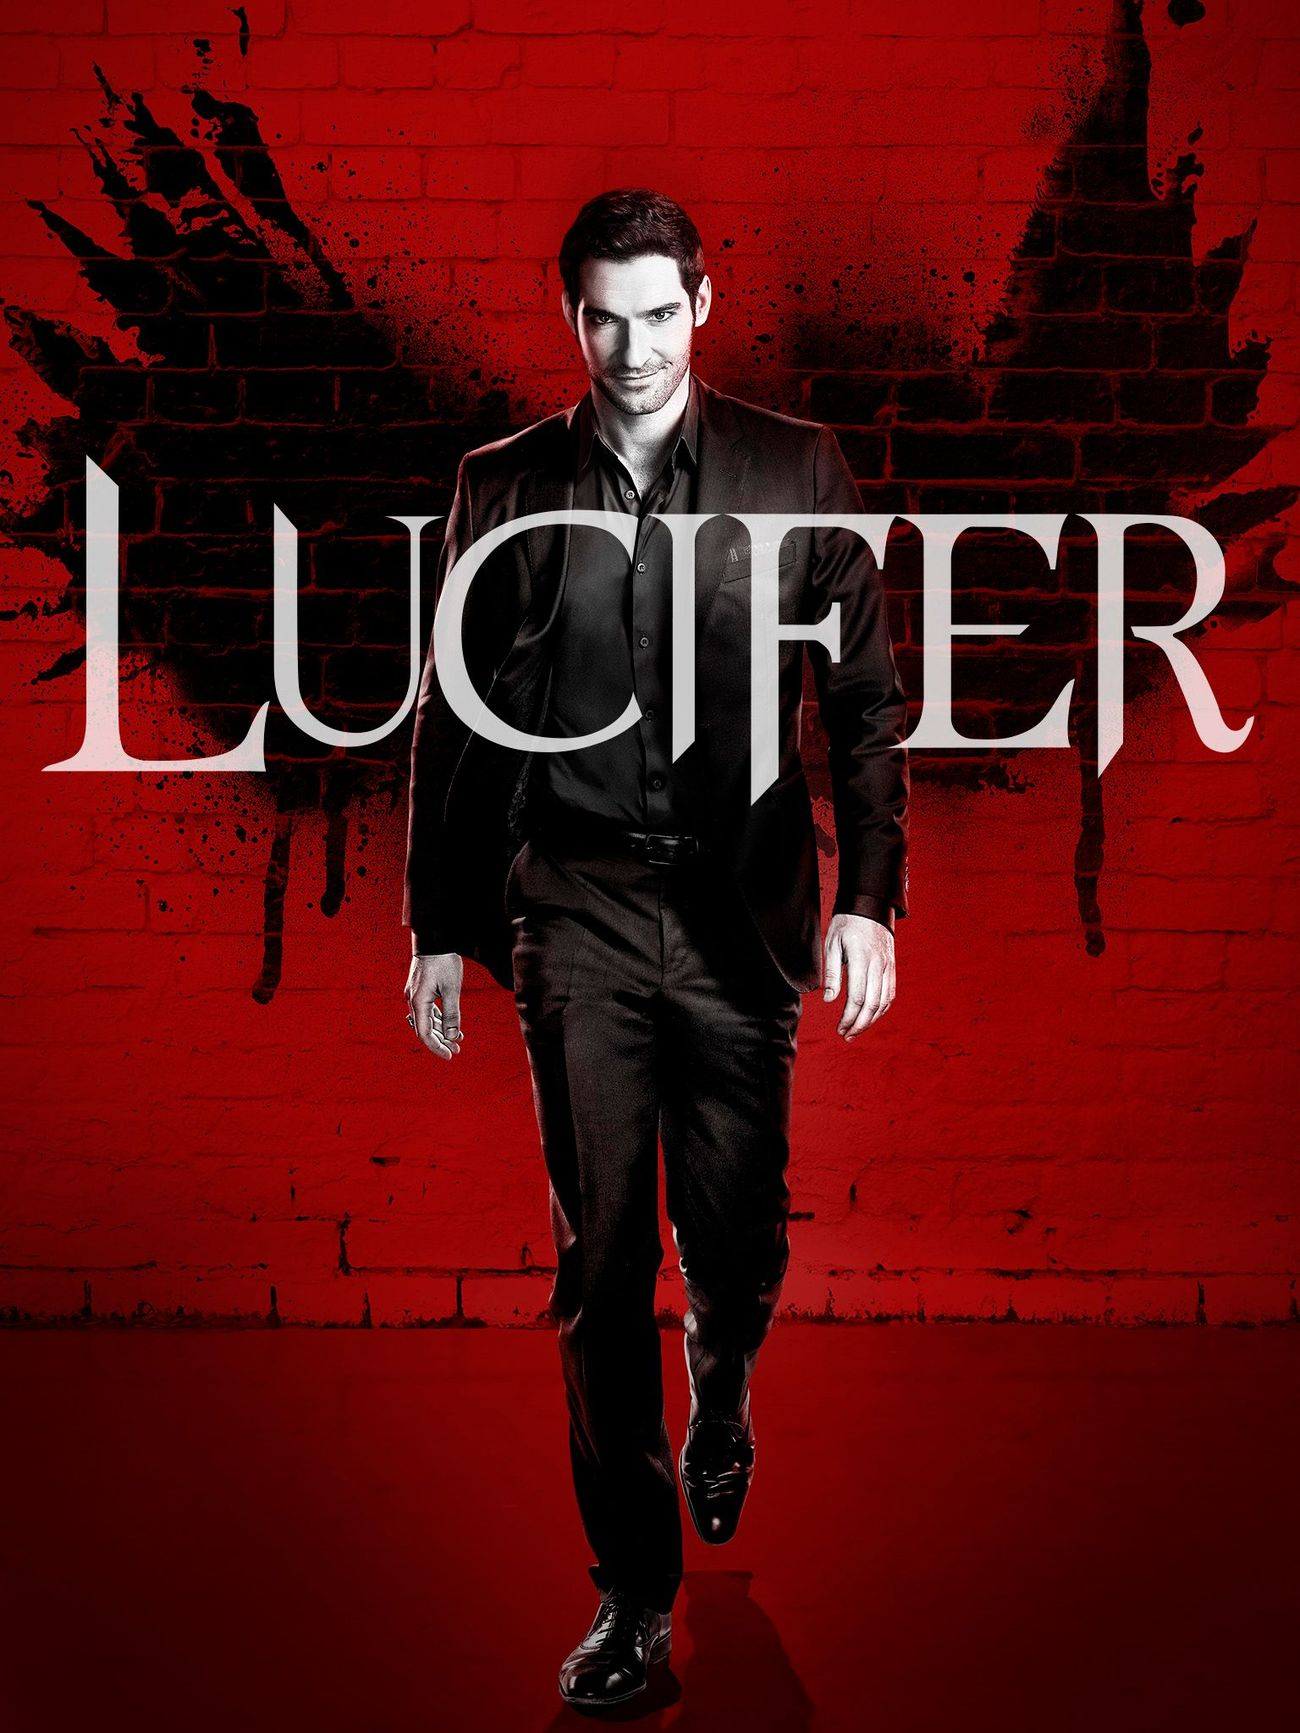

First we will import all the necessary libraries.

In [ ]:
import nltk
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
from wordcloud import WordCloud
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob

Now we will import the dataset.

In [ ]:
data=pd.read_csv("../input/twitter-data-for-luciferseason5/Twitter data for LuciferSeason5.csv")

In [ ]:
data.head()

But here we will mainly deal with the tweets only, so we will ignore the other varibles, but one is free to do analysis of the rest of the variables also.

In [ ]:
data2=pd.DataFrame(data=data["tweet"],columns=["tweet"])
pd.set_option('display.max_colwidth',None)
data2.head()

So we can see that the text needs lots of cleaning, as it contains lots of unwanted things, also this will be the first step of text cleaning, there will be another level of cleaning, which will be done in the following steps. In this step we will mainly convert all the text to lowercase, remove hashtags, usernames, hyperlinks, images, punctuations and also correct other things like spelling mistakes and word expansion.

In [ ]:
def cleaned_text(text):
    clean=re.sub("http\S+","",text)
    clean=re.sub("pic.twitter\S+","",clean)
    clean=re.sub("#\S+","",clean)
    clean=clean.lower()
    clean=re.sub("@\S+","",clean)
    clean=re.sub("[^a-z]"," ",clean)
    clean=re.sub("can t","can not",clean)
    clean=re.sub("don t","do not",clean)
    clean=re.sub("pleaseee","please",clean)
    clean=re.sub("plss","please",clean)
    clean=re.sub("haven t","have not",clean)
    clean=re.sub("you re","you are",clean)
    clean=re.sub("aren t","are not",clean)
    clean=re.sub("there s","there is",clean)
    clean=re.sub("isn t","is not",clean)
    clean=re.sub("it s","it is",clean)
    clean=re.sub(r"\s+[a-z]\s+"," ",clean)
    clean=re.sub(r"\s+[a-z]\s+"," ",clean)
    clean=re.sub("winzzzzzzz","win",clean)
    clean=re.sub("pleaseeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeeee","please",clean)
    clean=re.sub("ishould","should",clean)
    clean=re.sub("omg","oh my god",clean)
    clean=re.sub("yessss","yes",clean)
    clean=re.sub("gonna","going to",clean)
    clean=re.sub("iseem","seem",clean)
    clean=re.sub("maybe","may be",clean)
    clean=re.sub("dont","do not",clean)
    clean=re.sub("wouldnt","would not",clean)
    clean=re.sub("imma","i am going to",clean)
    clean=re.sub("btw","by the way",clean)
    clean=re.sub("breath","breathe",clean)
    clean=re.sub("fanfic","fan fiction",clean)
    clean=re.sub("yall","you all",clean)
    clean=re.sub("cannot","can not",clean)
    clean=re.sub("eachother","each other",clean)
    clean=re.sub("hubbys","husbands",clean)
    clean=re.sub("frees","free",clean)
    clean=re.sub("cking","fucking",clean)
    clean=re.sub("dyiiiiiiiiiiing","dying",clean)
    clean=re.sub("wheennn","when",clean)
    clean=re.sub("pls","please",clean)
    clean=re.sub("sofar","so far",clean)
    clean=re.sub("soooon","soon",clean)
    clean=re.sub("fufucking","fucking",clean)
    clean=re.sub("sooooo","so",clean)
    clean=re.sub("plz","please",clean)
    clean=re.sub("pleeeaaaasssseeeee","please",clean)
    clean=re.sub("fvfucking","fucking",clean)
    clean=re.sub("soooooo","so",clean)
    clean=re.sub("listenning","listening",clean)
    clean=re.sub("yeeeeesss","yes",clean)
    clean=re.sub("seaon","season",clean)
    clean=re.sub("pleasee","please",clean)
    clean=re.sub("awesomeeeeeeeee","awesome",clean)
    clean=re.sub("waitttt","wait",clean)
    clean=re.sub("fking","fucking",clean)
    clean=re.sub("isoo","so",clean)
    clean=re.sub("lmao","laughing my ass off",clean)
    clean=re.sub("srsly","seriously",clean)
    clean=re.sub("yaaaaaassss","yes",clean)
    clean=re.sub("wanna","want to",clean)
    clean=re.sub("f ck","fuck",clean)
    clean=re.sub("guy","",clean)
    clean=re.sub("freakin","freaking",clean)
    clean=re.sub("tbh","to be honest",clean)
    clean=re.sub("soooo","so",clean)
    clean=re.sub("neighborhood","neighbourhood",clean)
    clean=re.sub("needdd","need",clean)
    clean=re.sub("cant","cannot",clean)
    clean=re.sub("isad","sad",clean)
    clean=re.sub("netflixxxx","netflix",clean)
    clean=re.sub("ppl","people",clean)
    clean=re.sub("sooo","so",clean)
    clean=re.sub("bbq","barbecue",clean)
    clean=re.sub("areally","really",clean)
    clean=re.sub("frifucking","freaking",clean)
    clean=clean.lstrip()
    clean=re.sub("\s{2,}"," ",clean)
    return clean
data2["cleaned_tweets"]=data2["tweet"].apply(cleaned_text)

Now we will take a look at the first 5 row of the data to check whether things that we were trying to do, has been done or not.

In [ ]:
data2.head()

And it seems we have been able to achieve our first goal, our text is much cleaner now. Now we will create another column which will be the count of number of words for each row.

In [ ]:
data2['Number_of_words'] = data2['cleaned_tweets'].apply(lambda x:len(str(x).split()))

So now we will show the distribution of the number of words using a histogram.

In [ ]:
plt.style.use('ggplot')
plt.figure(figsize=(14,6))
sns.distplot(data2['Number_of_words'],kde = False,color="red")
plt.title("Frequency distribution of number of words for each tweet", size=20)

Now we will start our next step of cleaning which includes stopwords removal, tokenization and bringing back the words to it's base form using lemmatization. Basically there exists two ways by which we can bring the words to their base form, i.e., stemming and lemmatization, but particularly I am not a big fan of stemming, so we will use lemmatization here to achieve our that objective.

In [ ]:
nltk.download("stopwords")
from nltk.corpus import stopwords
stop=stopwords.words('english')
data2["cleaned_clean_tweets"]=data2["cleaned_tweets"].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

Now we will check what includes stopwords.

In [ ]:
print(stop)

Now we will do tokenization and lemmatization.

In [ ]:
data2["cleaned_clean_tweets"]=data2["cleaned_clean_tweets"].apply(lambda x: nltk.word_tokenize(x))

In [ ]:
def word_lemmatizer(text):
    lem_text = [WordNetLemmatizer().lemmatize(i,pos='v') for i in text]
    return lem_text
data2["cleaned_clean_tweets"]=data2["cleaned_clean_tweets"].apply(lambda x: word_lemmatizer(x))
data2["cleaned_clean_tweets"]=data2["cleaned_clean_tweets"].apply(lambda x: ' '.join(x))

Now almost all the text pre-processing steps has been done, now we will move to some visualization and finally sentiments labelling. First we will start our visualization by plotting 20 most frequent words, and we will show it using bar graph.

In [ ]:
plt.style.use('ggplot')
plt.figure(figsize=(14,6))
freq=pd.Series(" ".join(data2["cleaned_clean_tweets"]).split()).value_counts()[:20]
freq.plot(kind="bar")
plt.title("20 most frequent words",size=20)

Now we will do word clouding.

In [ ]:
cloud=WordCloud(colormap="Dark2").generate(str(data2["cleaned_clean_tweets"]))
fig=plt.figure(figsize=(12,18))
plt.axis("off")
plt.imshow(cloud,interpolation='bilinear')

So in the above wordcloud we can see the words like wait, share, release, begin, long, etc., and these are coming because as the release date of the show has not been announced yet, so fans are desperately waiting for the release date of the show. So in this data, people are mostly talking about the release date of the show.

Now we will move to our final step of sentiment labelling using textblob library.

In [ ]:
def analyze_sentiment(tweet):
    analysis = TextBlob(tweet)
    if analysis.sentiment.polarity > 0:     #### For positive sentiment
        return 1
    elif analysis.sentiment.polarity == 0:  ### Neutral
        return 0
    else:
        return -1                           #### Negative sentiment

data2['SA'] = data2["cleaned_clean_tweets"].apply(lambda x: analyze_sentiment(x))

So sentiment labelling has been done, now we will check how many of them are postive, negative and neutral, and we will do that using visualization.

In [ ]:
descending_order=data2["SA"].value_counts().sort_values(ascending=False).index
sns.catplot(x="SA",data=data2,kind="count",height=5,aspect=2,order=descending_order)

We will do this using another method.

In [ ]:
another_method = data2.groupby('SA').count()['cleaned_clean_tweets'].reset_index().sort_values(by='cleaned_clean_tweets',ascending=False)
another_method.style.background_gradient(cmap='Purples')

Also we will check percentages for +ve, -ve and neutral tweets.

In [ ]:
print(len(data2[data2["SA"]==1])/len(data2["SA"])*100)  ##positive
print(len(data2[data2["SA"]==0])/len(data2["SA"])*100)  ##neutral
print(len(data2[data2["SA"]==-1])/len(data2["SA"])*100) ##negative

So in the above two visualizations we can see that most of the tweets are postive, i.e., 4644 tweets are positive, 4056 are neutral and 1057 are negative, and it is obvious that most number of tweets are positive as fans like the show so much. Now we will see using wordcloud what are the frequent words used for both positive and negative tweets.

And first we will create wordcloud for poitive tweets.

In [ ]:
cloud=WordCloud(colormap="Dark2").generate(str(data2[data2["SA"]==1]["cleaned_clean_tweets"]))
fig=plt.figure(figsize=(12,14))
plt.axis("off")
plt.imshow(cloud,interpolation='bilinear')

And finally we create wordcloud for negative tweets.

In [ ]:
cloud=WordCloud(colormap="Dark2").generate(str(data2[data2["SA"]==-1]["cleaned_clean_tweets"]))
fig=plt.figure(figsize=(12,18))
plt.axis("off")
plt.imshow(cloud,interpolation='bilinear')

This is the end of our analysis. Don't forget to upvote and comment if you like, or if you have any feedback. Also you guys are free to come up with your own analysis. Thank you!!!!!!!!!!